<a href="https://colab.research.google.com/github/sauravbiswas-git/fassion_minest_classification/blob/main/fassion_minest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First import necessary libraies like tensorflow,keras,numpy and matplotlib.Then check the version of tensorflow.


In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
#Tensorflow and keras
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
#numpy for numerical operation in python and matplotlib for as ploting libraies
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


**Loadin Dataset From keras**

In [2]:
#import the dataset
fm = keras.datasets.fashion_mnist
#loading the dataset
(train_images,train_labels),(test_images,test_labels) = fm.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).The dataset already aveliable in keras library.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Size of the each image & Total number of images in training DatasetExplotary data Analysis**
Let's explore the train dataset for training the model.



In [4]:
#explore the size of images in train images & length of images
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


**Size of the each image in test dataset and total length of test dataset**

In [5]:
#explore the size of images in test images & length of images
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


**Visualising the train image according to index value and image label**

The below code take an integer input from user which is image index of traing data and showing the coresponding label and image.

Enter index value: 125
Image label:  2


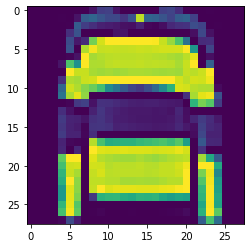

In [6]:
#view a training image
#take image_index from user
img_index=int(input("Enter index value: "))
img=train_images[img_index]
print("Image label: ",train_labels[img_index])
plt.imshow(img)

[Label	 /   Class]
0	   >    T-shirt/top
1	    >     Trouser
2	     >    Pullover
3       >  	Dress
4	       >   Coat
5	        > Sandal
6	     >    Shirt
7	      >  Sneaker
8       >  	Bag
9	     > Ankle boot

**Defining the Model and its Architecture**


The Model defined is a very simple,here we build up a nural network model which can classify the images.We essentially hav 28 by 28 images where 28 rows & 28 columns & each cell value from 0 to 1. Mathematically a fuction operate on image which maps a coresponding label(0 to 9).


---
Flatten layer which takes 28 by 28 pixels values and convert into array of 784 numbers.Then the 784 numbers becomes a input of **Dense** 128 units hidden layer and output of hidden layer becomes input of output layer which consist 10 unit each unit denote one class.Here we use **relu as activation fuction** in hidden layer's non linear part.& as well as **softmax acctivation function** in output layer.







In [7]:
##Creat our NN model
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Compiling the Model and Training**

Let's compile the model. For compiling the model firstly specify what kind of optimizer and loss fuction use,here i use Adam optimizer which is adptive learning rate optimization and sparse categorical crossentropy loss function.

In [9]:
#Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**model.fit** fits the model to training data,here we simpilly specify the training images or features and training labels.I train this model for 5 epocchs and default batch size 32.For longer epochs the model may be overfited.

In [16]:
#Train the model
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4474 - accuracy: 0.8494
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8507
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4464 - accuracy: 0.8503
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8490
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4421 - accuracy: 0.8521


On basic backgraound of ML, a ML algo to work well on future data.& this dataset is called test data which is not exposed during train the model.

In [11]:
#Evaluate the model
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.8008


[0.6065678596496582, 0.8008000254631042]

**model.predict** work on test feature which is predict first 5 coresponding labels.

In [23]:
#Make a classification
predictions = model.predict(test_images[0:5])
#print prediction labels
print(np.argmax( predictions,axis=1))


[9 2 1 1 6]


first 5 test images

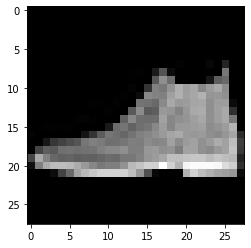

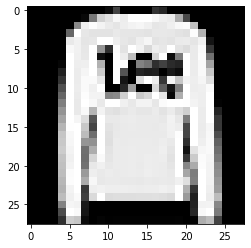

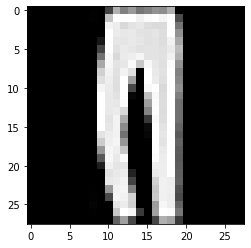

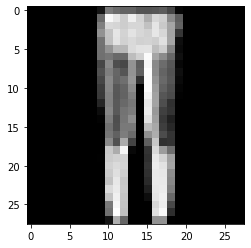

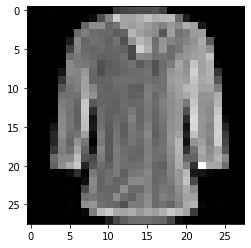

In [30]:
#print the actual first 5 images
for i in range(0,5):
  new_image=test_images[i]
  new_image=np.array(new_image,dtype='float')
  pixels=new_image.reshape((28,28))
  plt.imshow(test_images[i],cmap='gray')
  plt.show()